In [2]:
# Chemin vers le fichier texte
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire les premières lignes du fichier
    for i in range(10):
        ligne = fichier.readline()
        print(ligne)


# Directed graph (each unordered pair of nodes is saved once): CA-GrQc.txt 

# Collaboration network of Arxiv General Relativity category (there is an edge if authors coauthored at least one paper)

# Nodes: 5242 Edges: 28980

# FromNodeId	ToNodeId

3466	937

3466	5233

3466	8579

3466	10310

3466	15931

3466	17038



In [6]:
import networkx as nx

# Chemin vers le fichier texte
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Afficher des informations sur le graphe
print("Nombre d'auteurs :", len(graphe_collaboration.nodes))
print("Nombre de collaborations :", len(graphe_collaboration.edges))


Nombre d'auteurs : 5244
Nombre de collaborations : 14497


In [9]:
import networkx as nx

# Chemin vers le fichier texte
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                if not graphe_collaboration.has_node(auteur1):
                    graphe_collaboration.add_node(auteur1, affiliation="Université A")
                if not graphe_collaboration.has_node(auteur2):
                    graphe_collaboration.add_node(auteur2, affiliation="Université B")
                # Ajouter le lien (collaboration) entre les auteurs
                poids_lien = 1  # Vous pouvez calculer le poids en fonction de certaines caractéristiques
                graphe_collaboration.add_edge(auteur1, auteur2, poids=poids_lien)

# Afficher des informations sur les nœuds et les liens
print("Nombre d'auteurs :", len(graphe_collaboration.nodes))
print("Nombre de collaborations :", len(graphe_collaboration.edges))

# Afficher les attributs d'un nœud spécifique
auteurA = "nom_d_un_auteur"  # Remplacez par le nom réel d'un auteur
if graphe_collaboration.has_node(auteurA):
    print("Affiliation de l'auteur A :", graphe_collaboration.nodes[auteurA]["affiliation"])
else:
    print("Le nœud de l'auteur A n'existe pas dans le graphe.")

# Afficher le poids d'un lien spécifique
auteurB = "nom_d_un_autre_auteur"  # Remplacez par le nom réel d'un autre auteur
if graphe_collaboration.has_edge(auteurA, auteurB):
    print("Poids du lien entre auteur A et auteur B :", graphe_collaboration[auteurA][auteurB]["poids"])
else:
    print("Le lien entre l'auteur A et l'auteur B n'existe pas dans le graphe.")


Nombre d'auteurs : 5244
Nombre de collaborations : 14497
Le nœud de l'auteur A n'existe pas dans le graphe.
Le lien entre l'auteur A et l'auteur B n'existe pas dans le graphe.


In [14]:
# Obtenir une liste de tous les composants connectés
connected_components = list(nx.connected_components(graphe_collaboration))

# Trouver le plus grand composant connecté
largest_component_nodes = max(connected_components, key=len)

# Créer un sous-graphe à partir du plus grand composant connecté
largest_component = graphe_collaboration.subgraph(largest_component_nodes)

# Analyser les chemins sur le plus grand composant connecté
average_shortest_path_length = nx.average_shortest_path_length(largest_component)


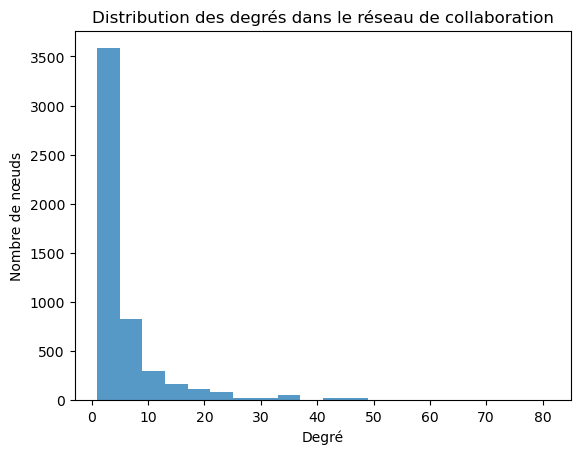

In [16]:
import networkx as nx
import matplotlib.pyplot as plt

# Chemin vers le fichier texte contenant les données de collaboration
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Obtenir les degrés de tous les nœuds
degrees = [degree for node, degree in graphe_collaboration.degree()]

# Tracer l'histogramme de la distribution des degrés
plt.hist(degrees, bins=20, alpha=0.75)
plt.title("Distribution des degrés dans le réseau de collaboration")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()


In [17]:
import networkx as nx

# Chemin vers le fichier texte contenant les données de collaboration
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Obtenir les composants connectés
composants_connectes = list(nx.connected_components(graphe_collaboration))

# Afficher le nombre de composants connectés
print("Nombre de composants connectés :", len(composants_connectes))

# Afficher la taille de chaque composant connecté
for i, composant in enumerate(composants_connectes):
    print(f"Composant connecté {i+1} : {len(composant)} nœuds")


Nombre de composants connectés : 356
Composant connecté 1 : 2 nœuds
Composant connecté 2 : 4158 nœuds
Composant connecté 3 : 2 nœuds
Composant connecté 4 : 3 nœuds
Composant connecté 5 : 2 nœuds
Composant connecté 6 : 2 nœuds
Composant connecté 7 : 2 nœuds
Composant connecté 8 : 2 nœuds
Composant connecté 9 : 2 nœuds
Composant connecté 10 : 10 nœuds
Composant connecté 11 : 2 nœuds
Composant connecté 12 : 2 nœuds
Composant connecté 13 : 2 nœuds
Composant connecté 14 : 4 nœuds
Composant connecté 15 : 3 nœuds
Composant connecté 16 : 3 nœuds
Composant connecté 17 : 2 nœuds
Composant connecté 18 : 6 nœuds
Composant connecté 19 : 4 nœuds
Composant connecté 20 : 3 nœuds
Composant connecté 21 : 3 nœuds
Composant connecté 22 : 2 nœuds
Composant connecté 23 : 3 nœuds
Composant connecté 24 : 2 nœuds
Composant connecté 25 : 2 nœuds
Composant connecté 26 : 3 nœuds
Composant connecté 27 : 2 nœuds
Composant connecté 28 : 2 nœuds
Composant connecté 29 : 6 nœuds
Composant connecté 30 : 3 nœuds
Composan

In [21]:
import networkx as nx

# Chemin vers le fichier texte contenant les données de collaboration
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Obtenir les composants connectés
composants_connectes = list(nx.connected_components(graphe_collaboration))

# Trouver le plus grand composant connecté
graphe_connecte = max((graphe_collaboration.subgraph(c) for c in composants_connectes), key=len)

# Calculer la longueur moyenne des chemins les plus courts
average_shortest_path_length = nx.average_shortest_path_length(graphe_connecte)

# Afficher la longueur moyenne des chemins les plus courts
print("Longueur moyenne des chemins les plus courts :", average_shortest_path_length)


Longueur moyenne des chemins les plus courts : 6.049380016182999


In [22]:
import networkx as nx

# Chemin vers le fichier texte contenant les données de collaboration
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"
# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Calculer le coefficient de clustering moyen
average_clustering_coefficient = nx.average_clustering(graphe_collaboration)

# Calculer la densité du graphe
density = nx.density(graphe_collaboration)

# Afficher les résultats
print("Coefficient de clustering moyen :", average_clustering_coefficient)
print("Densité du graphe :", density)


Coefficient de clustering moyen : 0.5294338141753044
Densité du graphe : 0.0010545461581625744


In [23]:
import networkx as nx

# Chemin vers le fichier texte contenant les données de collaboration
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)

# Calculer la centralité d'intermédiarité
betweenness_centrality = nx.betweenness_centrality(graphe_collaboration)

# Calculer la centralité de proximité
closeness_centrality = nx.closeness_centrality(graphe_collaboration)

# Calculer la centralité de vecteur propre
eigenvector_centrality = nx.eigenvector_centrality(graphe_collaboration)

# Afficher les résultats
print("Centralité d'intermédiarité :", betweenness_centrality)
print("Centralité de proximité :", closeness_centrality)
print("Centralité de vecteur propre :", eigenvector_centrality)


Centralité d'intermédiarité : {'# FromNodeId': 0.0, 'ToNodeId': 0.0, '3466': 0.0017139396439711163, '937': 0.0003490747946372017, '5233': 0.0, '8579': 0.00035811466225570945, '10310': 0.008751856756630788, '15931': 0.003003799799850303, '17038': 0.009711822312637468, '18720': 0.0, '19607': 3.0491603698733016e-05, '1854': 0.0010766987697820032, '4583': 0.0003396746054110421, '9572': 0.025669408735957643, '10841': 0.0027051029072898227, '13056': 0.0036561128066172305, '14982': 0.0, '16310': 0.010141017901272191, '19640': 0.007175041431679261, '23855': 0.0033990188602758087, '24372': 0.0, '24814': 0.005498374359784702, '5052': 0.024403601134095617, '899': 5.768787580905185e-05, '1796': 0.0, '2287': 0.003718279780772033, '3096': 0.0021701002575358823, '3386': 0.003461548488893764, '4472': 0.0012487659135640404, '5346': 0.011001614532032748, '5740': 0.0, '6094': 0.0004970532163026276, '6376': 0.0, '9124': 0.0072147842157104115, '10235': 0.002047578467587654, '10427': 0.0025141816110480363, 

In [25]:
import networkx as nx

# Charger le graphe de collaboration
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Calculer la centralité d'intermédiarité pour tous les nœuds
centralite_intermediarite = nx.betweenness_centrality(graphe_collaboration)

# Calculer la moyenne de la centralité d'intermédiarité
moyenne_centralite_intermediarite = sum(centralite_intermediarite.values()) / len(centralite_intermediarite)

# Afficher la moyenne de la centralité d'intermédiarité
print("Moyenne de la centralité d'intermédiarité :", moyenne_centralite_intermediarite)


Moyenne de la centralité d'intermédiarité : 0.0006062707858585091


In [29]:
import networkx as nx

# Charger le graphe de collaboration
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Appliquer l'algorithme de K-clique
k_cliques = list(nx.find_cliques(graphe_collaboration))

# Afficher les communautés identifiées
print("Communautés identifiées par l'algorithme de K-clique :")
for i, clique in enumerate(k_cliques, start=1):
    print("Communauté", i, ":", clique)


Communautés identifiées par l'algorithme de K-clique :
Communauté 1 : ['2560', '10926', '15003', '21508', '4146', '16594', '9785', '13164', '12553', '18668']
Communauté 2 : ['26098', '24568', '1545', '15600']
Communauté 3 : ['26098', '24568', '1545', '8547']
Communauté 4 : ['26098', '23855', '16640']
Communauté 5 : ['16159', '6610']
Communauté 6 : ['16159', '23134', '17859']
Communauté 7 : ['16159', '4952']
Communauté 8 : ['6340', '2338', '2530', '14766', '19645', '10350', '15244', '4755', '9656', '16654', '15010', '88', '1995', '17807', '12507', '18225', '7635', '7197', '6512', '2535', '19939', '9869', '15933', '20576', '18453', '18778', '4355', '21178', '2449', '9313', '14648', '19114']
Communauté 9 : ['6340', '2338', '2530', '14766', '19645', '10350', '15244', '4755', '9656', '16654', '15010', '88', '1995', '17807', '12507', '18225', '7635', '7197', '6512', '2535', '19939', '9869', '15933', '20576', '20574', '5210', '15457', '19446', '15245', '24718', '12710', '22504', '23712', '872

In [30]:
import networkx as nx

# Charger le graphe de collaboration
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Appliquer l'algorithme de propagation des labels
communautes = nx.algorithms.community.label_propagation.label_propagation_communities(graphe_collaboration)

# Afficher les communautés identifiées
print("Communautés identifiées par l'algorithme de propagation des labels :")
for i, communaute in enumerate(communautes, start=1):
    print("Communauté", i, ":", communaute)


Communautés identifiées par l'algorithme de propagation des labels :
Communauté 1 : {'18233', '15931', '4135', '8579', '937', '1860', '19607', '3466', '18720'}
Communauté 2 : {'10310', '5233', '24372'}
Communauté 3 : {'19089', '18067', '21968', '17038', '20033', '24578', '13389', '16770', '15198', '7277', '16766'}
Communauté 4 : {'17968', '3875', '25866', '2655', '14967', '20008', '495', '1854', '9458'}
Communauté 5 : {'4583', '19084', '10468'}
Communauté 6 : {'9572', '21316', '22900', '10158', '25601'}
Communauté 7 : {'19159', '9710', '10526', '10841', '22439', '21438', '19107', '14818', '18189', '21776', '11788', '22611'}
Communauté 8 : {'13056', '22100', '16265', '14982', '19791'}
Communauté 9 : {'16310', '15419', '12337', '5246'}
Communauté 10 : {'25359', '19923', '8072', '25289', '20664', '624', '4705', '13649', '5579', '25060', '6907', '15784', '3231', '15184', '8823', '23387', '5407', '21860', '20956', '9639', '3719', '12928', '18487', '22837', '11082', '21931', '19640', '6700',

In [32]:
pip install python-louvain


     ---------------------------------------- 0.0/204.6 kB ? eta -:--:--
     --- --------------------------------- 20.5/204.6 kB 682.7 kB/s eta 0:00:01
     ------- ----------------------------- 41.0/204.6 kB 495.5 kB/s eta 0:00:01
     ----------- ------------------------- 61.4/204.6 kB 469.7 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/204.6 kB 525.1 kB/s eta 0:00:01
     ------------------ ----------------- 102.4/204.6 kB 538.9 kB/s eta 0:00:01
     --------------------- -------------- 122.9/204.6 kB 516.7 kB/s eta 0:00:01
     ------------------------------ ----- 174.1/204.6 kB 525.1 kB/s eta 0:00:01
     ------------------------------------ 204.6/204.6 kB 566.8 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9403 sha256=bf96f10b239de93abb32967fb7b9faebd18bef89473b6e03d4b4b53141555881
  Stored in directory

In [33]:
import networkx as nx
import community  # Assurez-vous d'avoir cette bibliothèque installée : pip install python-louvain

# Charger le graphe de collaboration
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Détecter les communautés avec l'algorithme de Louvain
communautes = community.best_partition(graphe_collaboration)

# Organiser les nœuds par communauté
communautes_organisees = {}
for noeud, communaute in communautes.items():
    if communaute not in communautes_organisees:
        communautes_organisees[communaute] = []
    communautes_organisees[communaute].append(noeud)

# Afficher les communautés identifiées
print("Communautés identifiées par l'algorithme de Louvain :")
for i, membres_communaute in enumerate(communautes_organisees.values(), start=1):
    print("Communauté", i, ":", membres_communaute)


Communautés identifiées par l'algorithme de Louvain :
Communauté 1 : ['3466', '937', '8579', '15931', '17038', '18720', '19607', '20827', '21806', '8978', '9017', '15170', '15455', '16589', '2255', '3056', '6158', '7307', '7324', '8365', '9023', '11444', '12324', '12472', '13831', '14746', '16128', '17075', '18875', '19900', '20806', '21944', '21968', '23302', '23665', '23758', '24722', '12045', '12287', '14181', '20257', '21613', '16994', '19992', '3197', '6160', '8589', '9417', '14924', '15972', '18940', '19090', '19475', '22644', '22790', '24001', '25228', '8047', '1817', '3725', '5366', '15911', '4575', '18250', '25948', '1347', '4782', '15582', '17472', '19707', '21930', '24835', '24959', '24009', '283', '1880', '5505', '15959', '15961', '24444', '23256', '8376', '8888', '13067', '4213', '11892', '20645', '23264', '10600', '13493', '13496', '18788', '18791', '23394', '16953', '20191', '25934', '4896', '7277', '16766', '16770', '18408', '19089', '20033', '23429', '24578', '24149', 

In [35]:
pip install python-igraph

  Obtaining dependency information for python-igraph from https://files.pythonhosted.org/packages/f6/61/284623674aaf28b5c90e2c904e51514fdb6e97aabb5b9df76d0872fb4e39/python_igraph-0.11.4-py3-none-any.whl.metadata
  Obtaining dependency information for igraph==0.11.4 from https://files.pythonhosted.org/packages/51/32/638a52d18248771c606477e13b306f70474d2480a49f68860061acd573a7/igraph-0.11.4-cp39-abi3-win_amd64.whl.metadata
  Obtaining dependency information for texttable>=1.6.2 from https://files.pythonhosted.org/packages/24/99/4772b8e00a136f3e01236de33b0efda31ee7077203ba5967fcc76da94d65/texttable-1.7.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB 1.4 MB/s eta 0:00:02
   - -------------------------------------- 0.1/1.5 MB 1.1 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 919.0 kB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.5 MB 595.3 k

In [39]:
# Chemin vers le fichier texte
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"
nouveau_chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc_cleaned.txt"

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    lignes_propres = [ligne.strip() for ligne in fichier if not ligne.startswith("#")]

# Écrire les lignes propres dans un nouveau fichier
with open(nouveau_chemin_fichier, 'w') as nouveau_fichier:
    for ligne in lignes_propres:
        nouveau_fichier.write(ligne + "\n")

print("Fichier nettoyé avec succès.")


Fichier nettoyé avec succès.


In [40]:
import igraph as ig

# Charger le graphe de collaboration
graph = ig.Graph.Read_Edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc_cleaned.txt")

# Détecter les communautés avec l'algorithme Infomap
communities = graph.community_infomap()

# Afficher les communautés détectées
for idx, community in enumerate(communities):
    print(f"Communauté {idx + 1} : {community}")


Communauté 1 : [0]
Communauté 2 : [1]
Communauté 3 : [2]
Communauté 4 : [3]
Communauté 5 : [4]
Communauté 6 : [5]
Communauté 7 : [6]
Communauté 8 : [7]
Communauté 9 : [8]
Communauté 10 : [9]
Communauté 11 : [10]
Communauté 12 : [11]
Communauté 13 : [12]
Communauté 14 : [13, 7596, 11196, 19170]
Communauté 15 : [14, 14171]
Communauté 16 : [15]
Communauté 17 : [16]
Communauté 18 : [17]
Communauté 19 : [18]
Communauté 20 : [19]
Communauté 21 : [20]
Communauté 22 : [21]
Communauté 23 : [22, 106, 11183, 15793, 19440, 22618, 24490, 25043, 25829, 25849]
Communauté 24 : [23]
Communauté 25 : [24, 2826, 3858, 8857, 11522, 12235, 15774, 22129, 23161, 23216, 25387]
Communauté 26 : [25, 22891]
Communauté 27 : [26, 573, 1407, 2805, 3076, 3999, 4550, 4702, 4966, 6895, 8219, 8920, 8972, 9419, 11801, 12373, 12665, 12968, 13096, 13142, 13740, 14128, 17308, 19657, 19784, 21629, 22476, 24113, 25006]
Communauté 28 : [27, 2771, 5417, 5655, 11114, 13352, 13619, 16162, 18585, 18586, 19081, 20513, 22426, 24726,

In [44]:
import networkx as nx
import community  # Assurez-vous d'avoir cette bibliothèque installée : pip install python-louvain
import igraph as ig  # Assurez-vous d'avoir cette bibliothèque installée : pip install python-igraph
from sklearn.metrics import jaccard_score


In [45]:
# Chemin vers le fichier texte
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"

# Créer un graphe vide
graphe_collaboration = nx.Graph()

# Ouvrir le fichier en mode lecture
with open(chemin_fichier, 'r') as fichier:
    # Lire chaque ligne du fichier
    for ligne in fichier:
        # Supprimer les espaces blancs inutiles et vérifier si la ligne est vide
        ligne = ligne.strip()
        if ligne:
            # Diviser la ligne en éléments séparés
            elements = ligne.split('\t')
            # Vérifier si la ligne contient suffisamment d'éléments
            if len(elements) >= 2:
                # Identifier les nœuds (auteurs)
                auteur1, auteur2 = elements[0], elements[1]
                # Ajouter les nœuds au graphe s'ils ne sont pas déjà présents
                graphe_collaboration.add_node(auteur1)
                graphe_collaboration.add_node(auteur2)
                # Ajouter le lien (collaboration) entre les auteurs
                graphe_collaboration.add_edge(auteur1, auteur2)


In [46]:
# Identification des communautés avec l'algorithme K-clique
communautes_k_clique = list(nx.algorithms.community.k_clique_communities(graphe_collaboration, k=3))


In [47]:
# Identification des communautés avec l'algorithme de propagation des labels
communautes_propagation_labels = list(nx.algorithms.community.label_propagation.label_propagation_communities(graphe_collaboration))


In [48]:
# Identification des communautés avec l'algorithme de Louvain
partition = community.best_partition(graphe_collaboration)
communautes_louvain = []
for communaute in set(partition.values()):
    members = list(nodes for nodes in partition.keys() if partition[nodes] == communaute)
    communautes_louvain.append(members)


In [64]:
# Calculer l'indice de Jaccard entre les ensembles de communautés
intersection_k_clique_propagation = [len(communaute1.intersection(communaute2)) for communaute1, communaute2 in zip(communautes_k_clique, communautes_propagation_labels)]
intersection_k_clique_louvain = [len(communaute1.intersection(communaute2)) for communaute1, communaute2 in zip(communautes_k_clique, communautes_louvain)]
intersection_propagation_louvain = [len(communaute1.intersection(communaute2)) for communaute1, communaute2 in zip(communautes_propagation_labels, communautes_louvain)]

union_k_clique_propagation = [len(communaute1.union(communaute2)) for communaute1, communaute2 in zip(communautes_k_clique, communautes_propagation_labels)]
union_k_clique_louvain = [len(communaute1.union(communaute2)) for communaute1, communaute2 in zip(communautes_k_clique, communautes_louvain)]
union_propagation_louvain = [len(communaute1.union(communaute2)) for communaute1, communaute2 in zip(communautes_propagation_labels, communautes_louvain)]

jaccard_k_clique_propagation = [intersection / union for intersection, union in zip(intersection_k_clique_propagation, union_k_clique_propagation)]
jaccard_k_clique_louvain = [intersection / union for intersection, union in zip(intersection_k_clique_louvain, union_k_clique_louvain)]
jaccard_propagation_louvain = [intersection / union for intersection, union in zip(intersection_propagation_louvain, union_propagation_louvain)]

# Afficher les résultats
print("Indice de Jaccard entre les communautés détectées par K-clique et Propagation des labels:", jaccard_k_clique_propagation)
print("Indice de Jaccard entre les communautés détectées par K-clique et Louvain:", jaccard_k_clique_louvain)
print("Indice de Jaccard entre les communautés détectées par Propagation des labels et Louvain:", jaccard_propagation_louvain)


Indice de Jaccard entre les communautés détectées par K-clique et Propagation des labels: [0.1380020597322348, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.09090909090909091, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

In [66]:
import networkx as nx

# Calcul de la centralité d'intermédiarité
betweenness_centrality = nx.betweenness_centrality(graphe_collaboration)

# Calcul de la centralité de proximité
closeness_centrality = nx.closeness_centrality(graphe_collaboration)

# Calcul de la centralité de vecteur propre
eigenvector_centrality = nx.eigenvector_centrality(graphe_collaboration)

# Affichage des centralités pour les premiers auteurs
for auteur in list(graphe_collaboration.nodes)[:5]:
    print("Auteur:", auteur)
    print("Betweenness Centrality:", betweenness_centrality[auteur])
    print("Closeness Centrality:", closeness_centrality[auteur])
    print("Eigenvector Centrality:", eigenvector_centrality[auteur])
    print()


Auteur: 3466
Betweenness Centrality: 0.001715248119663197
Closeness Centrality: 0.15250009440442658
Eigenvector Centrality: 3.489474540927225e-05

Auteur: 937
Betweenness Centrality: 0.0003493412893676944
Closeness Centrality: 0.14789649865964416
Eigenvector Centrality: 1.459657837625449e-05

Auteur: 5233
Betweenness Centrality: 0.0
Closeness Centrality: 0.14373793718636851
Eigenvector Centrality: 6.681320201491573e-06

Auteur: 8579
Betweenness Centrality: 0.00035838805830684087
Closeness Centrality: 0.14223737289668725
Eigenvector Centrality: 5.131748375726487e-06

Auteur: 10310
Betweenness Centrality: 0.00875853820067516
Closeness Centrality: 0.17089274080637024
Eigenvector Centrality: 0.0002698843812326264



In [67]:
import networkx as nx

# Charger le graphe de collaboration
graphe_collaboration = nx.read_edgelist(chemin_fichier)

# Nombre total d'entités (nœuds)
nombre_entites = graphe_collaboration.number_of_nodes()

# Nombre total de relations (liens)
nombre_relations = graphe_collaboration.number_of_edges()

print("Nombre total d'entités (nœuds) :", nombre_entites)
print("Nombre total de relations (liens) :", nombre_relations)


Nombre total d'entités (nœuds) : 5242
Nombre total de relations (liens) : 14496


In [68]:
import networkx as nx

# Charger le graphe depuis le fichier
chemin_fichier = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"
graphe = nx.read_edgelist(chemin_fichier)

# Attributs des nœuds
for node in graphe.nodes(data=True):
    print("Noeud :", node[0])
    print("Attributs :", node[1])

# Poids des liens
for edge in graphe.edges(data=True):
    print("Lien entre", edge[0], "et", edge[1])
    print("Poids :", edge[2]['weight'])


Noeud : 3466
Attributs : {}
Noeud : 937
Attributs : {}
Noeud : 5233
Attributs : {}
Noeud : 8579
Attributs : {}
Noeud : 10310
Attributs : {}
Noeud : 15931
Attributs : {}
Noeud : 17038
Attributs : {}
Noeud : 18720
Attributs : {}
Noeud : 19607
Attributs : {}
Noeud : 1854
Attributs : {}
Noeud : 4583
Attributs : {}
Noeud : 9572
Attributs : {}
Noeud : 10841
Attributs : {}
Noeud : 13056
Attributs : {}
Noeud : 14982
Attributs : {}
Noeud : 16310
Attributs : {}
Noeud : 19640
Attributs : {}
Noeud : 23855
Attributs : {}
Noeud : 24372
Attributs : {}
Noeud : 24814
Attributs : {}
Noeud : 5052
Attributs : {}
Noeud : 899
Attributs : {}
Noeud : 1796
Attributs : {}
Noeud : 2287
Attributs : {}
Noeud : 3096
Attributs : {}
Noeud : 3386
Attributs : {}
Noeud : 4472
Attributs : {}
Noeud : 5346
Attributs : {}
Noeud : 5740
Attributs : {}
Noeud : 6094
Attributs : {}
Noeud : 6376
Attributs : {}
Noeud : 9124
Attributs : {}
Noeud : 10235
Attributs : {}
Noeud : 10427
Attributs : {}
Noeud : 10597
Attributs : {}
Noeud 

KeyError: 'weight'

In [3]:
import networkx as nx
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger le graphe à partir du fichier
graphe = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Diviser les liens en ensembles d'apprentissage et de test
all_edges = list(graphe.edges())
edges_train, edges_test = train_test_split(all_edges, test_size=0.2, random_state=42)

# Générer les caractéristiques pour les liens
def generate_features(graph, edges):
    features = []
    for u, v in edges:
        common_neighbors = len(list(nx.common_neighbors(graph, u, v)))
        jaccard_coefficient = list(nx.jaccard_coefficient(graph, [(u, v)]))
        if len(jaccard_coefficient) > 0:
            jaccard_coefficient_value = jaccard_coefficient[0][2]
        else:
            jaccard_coefficient_value = 0
        features.append([common_neighbors, jaccard_coefficient_value])
    return features

X_train = generate_features(graphe, edges_train)
X_test = generate_features(graphe, edges_test)

# Préparer les étiquettes (1 pour les liens existants, 0 pour les liens manquants)
y_train = [1] * len(edges_train)
y_test = [1] * len(edges_test)

# Entraîner un classifieur RandomForest
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = clf.predict(X_test)

# Calculer l'exactitude des prédictions
accuracy = accuracy_score(y_test, y_pred)
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [6]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Utiliser K-means pour prédire les liens
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # spécifier explicitement n_init
kmeans.fit(X_train)

# Prédire les liens dans l'ensemble de test
predictions = kmeans.predict(X_test)

# Générer des étiquettes de classe pour l'ensemble de test (si disponibles)
true_labels = np.zeros(len(X_test))

# Évaluer la performance du modèle
accuracy = np.mean(predictions == true_labels)
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 0.5139751552795031


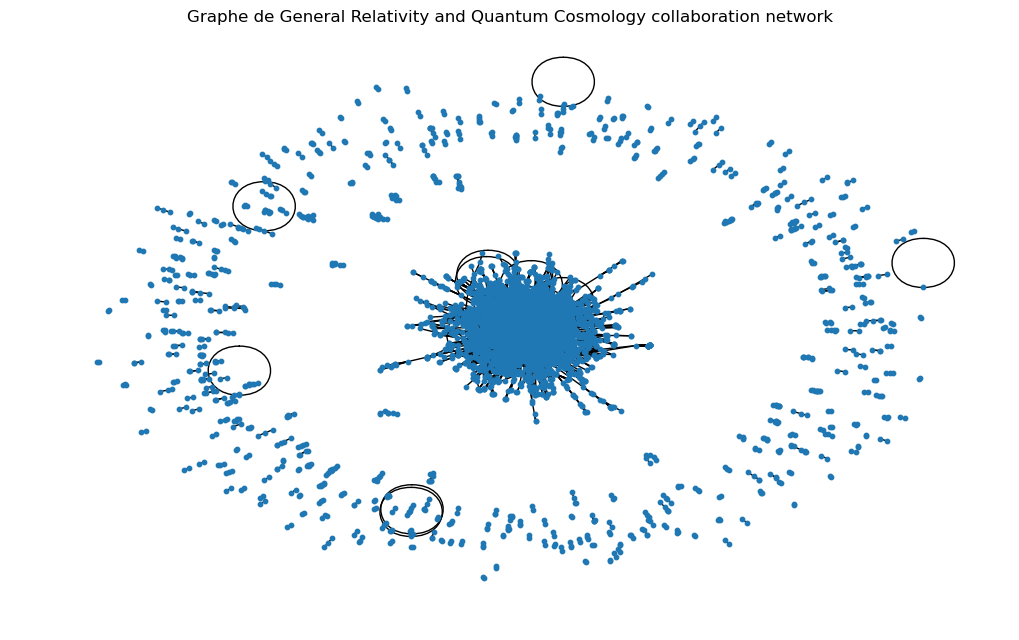

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Charger le graphe à partir du 'm'
file_path = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"
graphe = nx.read_edgelist(file_path)

# Dessiner le graphe
plt.figure(figsize=(10, 6))
nx.draw(graphe, node_size=10)
plt.title("Graphe de General Relativity and Quantum Cosmology collaboration network")
plt.show()

Nombre de nœuds : 5242
Nombre de liens : 14496


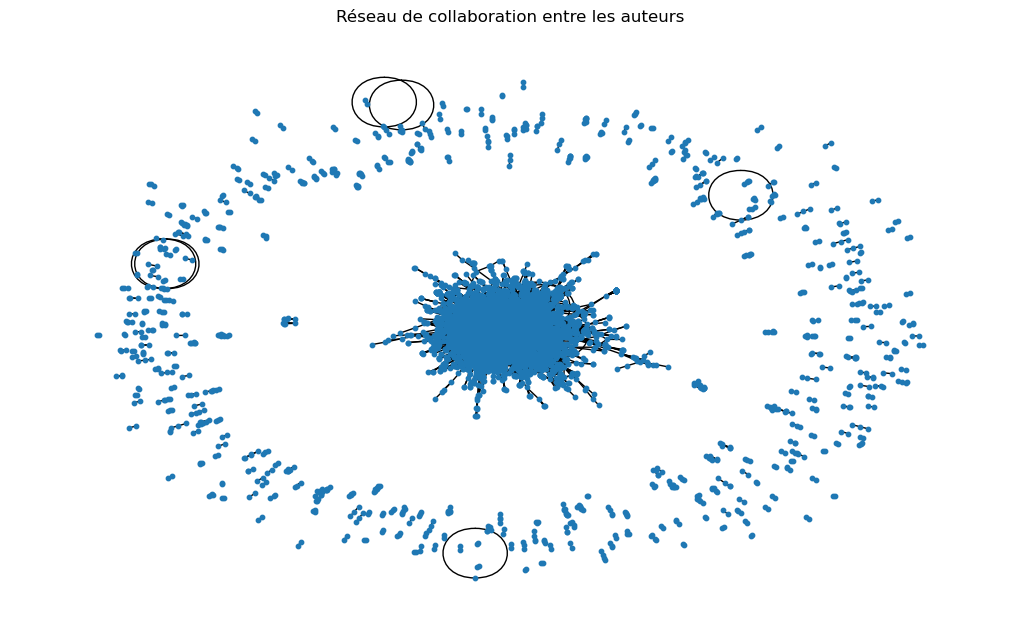

In [15]:
import networkx as nx

# Lecture du fichier de données
file_path = "C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt"
G = nx.read_adjlist(file_path)

# Affichage du nombre de nœuds et de liens dans le réseau
print("Nombre de nœuds :", G.number_of_nodes())
print("Nombre de liens :", G.number_of_edges())

# Affichage du réseau
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
nx.draw(G, with_labels=False, node_size=10)
plt.title("Réseau de collaboration entre les auteurs")
plt.show()


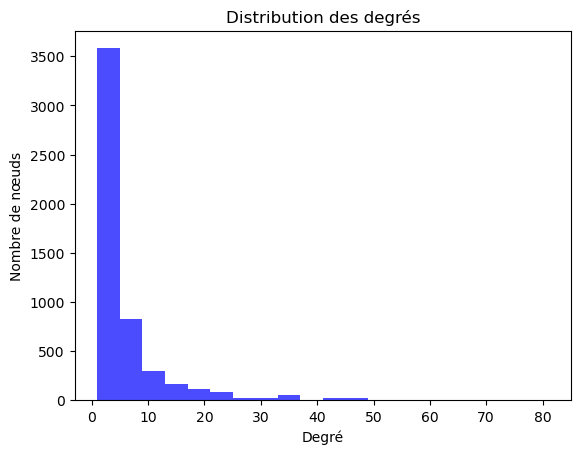

In [17]:
import networkx as nx
import matplotlib.pyplot as plt

# Charger le réseau à partir du fichier de données
graph = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Calculer la distribution des degrés
degree_sequence = [d for n, d in graph.degree()]

# Tracer l'histogramme de la distribution des degrés
plt.hist(degree_sequence, bins=20, color='b', alpha=0.7)
plt.title("Distribution des degrés")
plt.xlabel("Degré")
plt.ylabel("Nombre de nœuds")
plt.show()


In [18]:
import networkx as nx

# Charger le réseau à partir du fichier de données
graph = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Calculer les composants connectés
connected_components = list(nx.connected_components(graph))

# Afficher le nombre de composants connectés
print("Nombre de composants connectés :", len(connected_components))

# Afficher la taille de chaque composant connecté
for i, component in enumerate(connected_components):
    print("Taille du composant connecté", i+1, ":", len(component))


Nombre de composants connectés : 355
Taille du composant connecté 1 : 4158
Taille du composant connecté 2 : 2
Taille du composant connecté 3 : 3
Taille du composant connecté 4 : 2
Taille du composant connecté 5 : 2
Taille du composant connecté 6 : 2
Taille du composant connecté 7 : 2
Taille du composant connecté 8 : 2
Taille du composant connecté 9 : 10
Taille du composant connecté 10 : 2
Taille du composant connecté 11 : 2
Taille du composant connecté 12 : 2
Taille du composant connecté 13 : 4
Taille du composant connecté 14 : 3
Taille du composant connecté 15 : 3
Taille du composant connecté 16 : 2
Taille du composant connecté 17 : 6
Taille du composant connecté 18 : 4
Taille du composant connecté 19 : 3
Taille du composant connecté 20 : 3
Taille du composant connecté 21 : 2
Taille du composant connecté 22 : 3
Taille du composant connecté 23 : 2
Taille du composant connecté 24 : 2
Taille du composant connecté 25 : 3
Taille du composant connecté 26 : 2
Taille du composant connecté 27 

In [19]:
import networkx as nx

# Charger le réseau à partir du fichier de données
graph = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Calculer les longueurs des chemins les plus courts entre toutes les paires de nœuds
shortest_paths = dict(nx.all_pairs_shortest_path_length(graph))

# Calculer la distance moyenne entre les nœuds
total_distance = sum(sum(length.values()) for length in shortest_paths.values())
average_distance = total_distance / (graph.number_of_nodes() * (graph.number_of_nodes() - 1))

print("Distance moyenne entre les nœuds :", average_distance)


Distance moyenne entre les nœuds : 3.8061249382218865


In [22]:
pip install cdlib


Note: you may need to restart the kernel to use updated packages.


In [31]:
import networkx as nx
from networkx.algorithms import community
import cdlib
from cdlib import algorithms

# Charger le graphe de collaboration depuis un fichier ou une source de données
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Assurez-vous que le graphe est correctement chargé
print("Nombre de nœuds :", graphe_collaboration.number_of_nodes())
print("Nombre de liens :", graphe_collaboration.number_of_edges())

# Créer un graphe vide
graphe_vide = nx.Graph()

# Ajouter les nœuds et les liens au graphe vide
graphe_vide.add_edges_from(graphe_collaboration.edges())

# Convertir le graphe NetworkX en un objet CDLib
graphe_cdlib = cdlib.NodeClustering(communities=[], graph=graphe_vide)

# Détection des communautés avec l'algorithme Louvain
communautes_louvain = list(community.greedy_modularity_communities(graphe_vide))

# Détection des communautés avec l'algorithme de propagation des labels
communautes_label_prop = list(community.label_propagation_communities(graphe_vide))

# Détection des communautés avec l'algorithme K-clique
communautes_k_clique = list(community.k_clique_communities(graphe_vide, 3))  # Remplacer 3 par la taille de la clique désirée

# Affichage des communautés détectées
print("Communautés détectées avec Louvain : ", communautes_louvain)
print("Communautés détectées avec Propagation des labels : ", communautes_label_prop)
print("Communautés détectées avec K-clique : ", communautes_k_clique)


Nombre de nœuds : 5242
Nombre de liens : 14496
Communautés détectées avec Louvain :  [frozenset({'15186', '20959', '6094', '8222', '19454', '12688', '5485', '12806', '18736', '4466', '15580', '19234', '22177', '19051', '9895', '15614', '8200', '8787', '18286', '25354', '5400', '16280', '25316', '25996', '24587', '18724', '17979', '15082', '6317', '11113', '7386', '24568', '11801', '3965', '21495', '8932', '22188', '312', '9943', '19168', '836', '23751', '21407', '7563', '24295', '1497', '19167', '20207', '25572', '5740', '21321', '19495', '8408', '2846', '23647', '23092', '7855', '9184', '1321', '9143', '14559', '24614', '13282', '19445', '3076', '2465', '17590', '22699', '22265', '7442', '5602', '4242', '12247', '10879', '3772', '1045', '3631', '18399', '7541', '6642', '10918', '14932', '5181', '20373', '7522', '6838', '15435', '5564', '25962', '2182', '8224', '23622', '25610', '3194', '8063', '4283', '1488', '14009', '12110', '8305', '15419', '21391', '3910', '1006', '25516', '4102',

In [39]:
import networkx as nx
import cdlib
from cdlib import algorithms
from cdlib import NodeClustering

# Charger le graphe de collaboration depuis un fichier ou une source de données
graphe_collaboration = nx.read_edgelist("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt")

# Détection des communautés avec l'algorithme Louvain
communautes_louvain = algorithms.louvain(graphe_collaboration)

# Détection des communautés avec l'algorithme de propagation des labels
communautes_label_prop = algorithms.label_propagation(graphe_collaboration)

# Détection des communautés avec l'algorithme K-clique
communautes_k_clique = algorithms.kclique(graphe_collaboration, k=3)  # Remplacer 3 par la taille de la clique désirée

# Convertir le graphe NetworkX en un objet CDLib
graphe_cdlib = NodeClustering(communities=[], graph=graphe_collaboration)

# Détection des communautés avec l'algorithme Infomap
communautes_infomap = algorithms.infomap(graphe_collaboration)


# Afficher les communautés détectées avec Louvain
print("Communautés détectées avec Louvain : ")
for i, communaute in enumerate(communautes_louvain.communities):
    print(f"Communauté {i+1}: {communaute}")

# Afficher les communautés détectées avec Propagation des labels
print("Communautés détectées avec Propagation des labels : ")
for i, communaute in enumerate(communautes_label_prop.communities):
    print(f"Communauté {i+1}: {communaute}")
    
# Afficher les communautés détectées avec K-clique
print("Communautés détectées avec Propagation des labels : ")
for i, communaute in enumerate(communautes_k_clique.communities):
    print(f"Communauté {i+1}: {communaute}")
    
# Afficher les communautés détectées avec Infomap
print("Communautés détectées avec Louvain : ")
for i, communaute in enumerate(communautes_infomap.communities):
    print(f"Communauté {i+1}: {communaute}")


Communautés détectées avec Louvain : 
Communauté 1: ['4583', '9572', '16310', '899', '3096', '16148', '24371', '24559', '7689', '19738', '8916', '22184', '23647', '23708', '1765', '3032', '7442', '7768', '13276', '17266', '22415', '7264', '19489', '10762', '20647', '3909', '8862', '78', '4877', '7459', '8254', '12155', '22598', '24932', '888', '1520', '7007', '7712', '10711', '13614', '14102', '18517', '23351', '24114', '2465', '2592', '3977', '5055', '5993', '9265', '19890', '20341', '21560', '1375', '5555', '5787', '9721', '10158', '10942', '13600', '21316', '22900', '23770', '25143', '25601', '25980', '4870', '5175', '8282', '22046', '4766', '3561', '4868', '8352', '15365', '16931', '10620', '3679', '13955', '14003', '15235', '18227', '19445', '19495', '23967', '15399', '18222', '21287', '23227', '4624', '5355', '6863', '15770', '21322', '22265', '22336', '23099', '23880', '4319', '12758', '22023', '16575', '12587', '5840', '6732', '8614', '13847', '15081', '22609', '5143', '9735', 

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Générer des étiquettes pour les données d'apprentissage (1 pour les liens existants, 0 pour les liens inexistants)
y_train = np.array([1 if (u, v) in X_train else 0 for u, v in X_test])

# Extraire les caractéristiques (si nécessaire)
# Dans cet exemple, nous n'avons pas besoin d'extraire explicitement les caractéristiques car nous utilisons les liens eux-mêmes comme entrées.

# Initialiser le modèle de forêt aléatoire
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle sur les données d'apprentissage
rf_model.fit(X_test, y_train)

# Prédire les étiquettes pour les données de test
predictions = rf_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = np.mean(predictions == y_train)
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [54]:
from sklearn.model_selection import train_test_split
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Générer des étiquettes pour les données d'apprentissage (1 pour les liens existants, 0 pour les liens inexistants)
y_train = np.array([1 if (u, v) in X_train else 0 for u, v in X_train])

# Créer le modèle de réseau de neurones
model = Sequential()
model.add(Dense(64, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiler le modèle
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(np.array(X_train), y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur les données de test
y_test = np.array([1 if (u, v) in X_test else 0 for u, v in X_test])
accuracy = model.evaluate(np.array(X_test), y_test)[1]
print("Exactitude de prédiction sur les données de test:", accuracy)


Epoch 1/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 1s 799us/step - accuracy: 0.9694 - loss: 24.1369 - val_accuracy: 1.0000 - val_loss: 9.5593e-06
Epoch 2/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step - accuracy: 1.0000 - loss: 6.1883e-09 - val_accuracy: 1.0000 - val_loss: 9.5393e-06
Epoch 3/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 1.0000 - loss: 3.0747e-09 - val_accuracy: 1.0000 - val_loss: 9.5187e-06
Epoch 4/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 1.0000 - loss: 1.2114e-08 - val_accuracy: 1.0000 - val_loss: 9.4959e-06
Epoch 5/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 1.0000 - loss: 3.2398e-09 - val_accuracy: 1.0000 - val_loss: 9.4722e-06
Epoch 6/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step - accuracy: 1.0000 - loss: 4.2567e-09 - val_accuracy: 1.0000 - val_loss: 9.4481e-06
Epoch 7/10
580/580 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 1.0000 - loss: 3.2216e-09 - val_accuracy: 1.0000 - val_loss: 9.4242e-06
Epoch 8/10
580/580 ━━━━━━━━━━━━━━━━━━

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Entraîner le modèle de forêts aléatoires
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, np.zeros(len(X_train)))  # Aucune étiquette de classe n'est nécessaire pour cet exemple

# Prédire les liens dans l'ensemble de test
predictions = rf_model.predict(X_test)

# Générer des étiquettes de classe pour l'ensemble de test (si disponibles)
true_labels = np.zeros(len(X_test))

# Évaluer la performance du modèle
accuracy = np.mean(predictions == true_labels)
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Créer un classificateur KNN avec k=3 (par exemple)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entraîner le modèle sur les données d'apprentissage
knn_model.fit(X_train, np.zeros(len(X_train)))  # Aucune étiquette de classe n'est nécessaire pour cet exemple

# Prédire les liens dans l'ensemble de test
predictions = knn_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = np.mean(predictions == np.zeros(len(X_test)))
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [63]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Créer un classificateur MLP avec 3 couches cachées de 100 neurones chacune
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=1000)

# Entraîner le modèle sur les données d'apprentissage
mlp_model.fit(X_train, np.zeros(len(X_train)))  # Aucune étiquette de classe n'est nécessaire pour cet exemple

# Prédire les liens dans l'ensemble de test
predictions = mlp_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = np.mean(predictions == np.zeros(len(X_test)))
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Créer un classificateur d'arbre de décision
tree_model = DecisionTreeClassifier()

# Aucune étiquette de classe n'est nécessaire pour cet exemple
# Entraîner le modèle sur les données d'apprentissage
tree_model.fit(X_train, np.zeros(len(X_train)))

# Prédire les liens dans l'ensemble de test
predictions = tree_model.predict(X_test)

# Évaluer la performance du modèle
accuracy = np.mean(predictions == np.zeros(len(X_test)))
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 1.0


In [65]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
import numpy as np

# Charger le jeu de données à partir du fichier .txt
with open("C:\\Users\\MSI\\.jupyter\\lab\\workspaces\\ca-GrQc.txt\\CA-GrQc.txt", "r") as file:
    lines = file.readlines()

# Créer une liste de tuples contenant les liens
links = [tuple(map(int, line.strip().split())) for line in lines if not line.startswith("#")]

# Diviser les données en ensembles d'apprentissage et de test
X_train, X_test = train_test_split(links, test_size=0.2, random_state=42)

# Utiliser K-means pour prédire les liens
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)  # spécifier explicitement n_init
kmeans.fit(X_train)

# Prédire les liens dans l'ensemble de test
predictions = kmeans.predict(X_test)

# Générer des étiquettes de classe pour l'ensemble de test (si disponibles)
true_labels = np.zeros(len(X_test))

# Évaluer la performance du modèle
accuracy = np.mean(predictions == true_labels)
print("Exactitude de prédiction:", accuracy)


Exactitude de prédiction: 0.5139751552795031
